# Basic Recommender System using Collaborative Filtering approach for Movies 

In our project, we made 3 experiments to explore the collaborative filtering approaches user_based, item_based. 
we used MovieLens Data from Kaggle https://www.kaggle.com/grouplens/movielens-20m-dataset?select=rating.csv#.<hr>
First Experiment: we run the algorithm on the whole dataset<hr>
Second Experiment: we run the item_based and User_Based algorithms on a subset of Orginal Dataset  -> we took most active users and most rated movies. <hr>
Third Experiment: we run the item_based and User_Based algorithms on a subset of Orginal Dataset ->  we took the records of the first 610 users in MovieLens Data.<hr>

Finally,we can Recommend best N number of Movies To User X (Application) 


###### Note: This NoteBook only Include Ex1 and Exp2 , Application on (Ex 2),
Ex3 in the other attched NoteBook 

# Data Prepration and Visualization 

In [20]:
import numpy as np
import pandas as pd

#read file
ratings = pd.read_csv('rating.csv')

In [4]:
#explore columns
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [5]:
#print total number of records, # of distinct users, # of Distinct movies 
print("total number of records",len(ratings))
print("no. of distinct users",len(ratings.userId.unique()))
print("no. of distinct movies",len(ratings.movieId.unique()))

total number of records 20000263
no. of distinct users 138493
no. of distinct movies 26744


In [6]:
#explore datatypes of each column
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [7]:
#count number of NaN values
ratings.isna().sum() 

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [10]:
#descibe data
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [11]:
#calculate sparsity
n_users = ratings.userId.unique().shape[0]
n_items = ratings.movieId.unique().shape[0]

#Sparsity
print (len(ratings))
sparsity = len(ratings) / (n_items * n_users)
print (str(round(sparsity*100,2))+"%")

20000263
0.54%


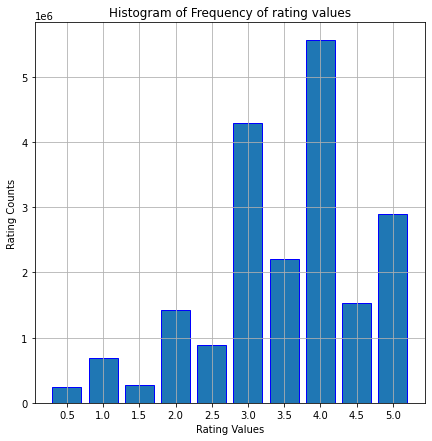

In [10]:
#Histogram of Frequency of rating values
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))
bin_edges = np.arange(0.25,5.5,0.5)

_ = plt.hist(ratings['rating'],bins = bin_edges,edgecolor="b",rwidth=0.8)
_ = plt.title('Histogram of Frequency of rating values')
_ = plt.xlabel('Rating Values')
_ = plt.ylabel('Rating Counts')
_ = plt.grid('True')

plt.xticks(np.arange(0.5,5.5,0.5))
plt.show()

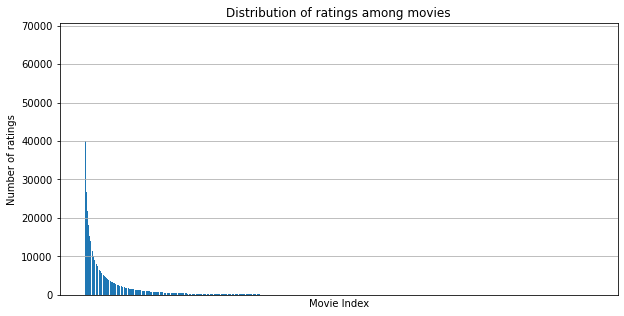

In [266]:
#Distribution of ratings among movies
from collections import Counter
plt.figure(figsize=(10,5))
plt.title('Distribution of ratings among movies')
plt.xlabel('Movie Index')
plt.ylabel('Number of ratings')
plt.grid('True')
# Sort movie ratings in decreasing order of ratings
ctr_movieratings = Counter(ratings['movieId'])
plt.xticks([], [])
plt.bar(np.arange(n_items),sorted(ctr_movieratings.values(),reverse = True))
plt.show()

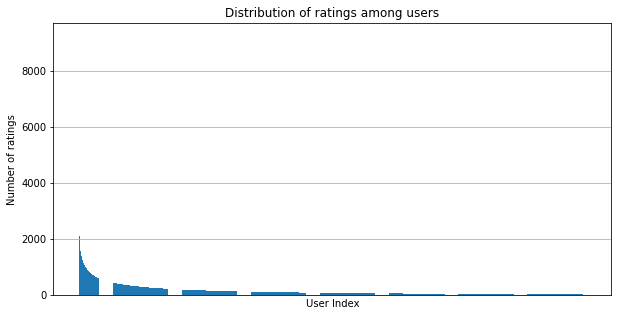

In [12]:
#Distribution of ratings among users
plt.figure(figsize=(10,5))
plt.title('Distribution of ratings among users')
plt.xlabel('User Index')
plt.ylabel('Number of ratings')
plt.grid('True')

# Sort user ratings in decreasing order of ratings
ctr_userratings = Counter(ratings['userId'])
plt.xticks([], [])
plt.bar(np.arange(n_users),sorted(ctr_userratings.values(),reverse = True))
plt.show()

# User-Based Collaborative Filttering Ex1 (MovieLens All Data)

In [289]:
'''
from surprise import KNNWithMeans
from surprise.model_selection.validation import cross_validate
from surprise import Dataset
from surprise import Reader
import pandas as pd

dataframe = pd.DataFrame({'itemID': list(ratings.movieId), 'userID': list(ratings.userId), 'rating': list(ratings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

#sweepking k from 2 to 100 by increments of 2
range1 = range(3,102,15)

rmse, mae = [], []
for k in range1:
    pearson = KNNWithMeans(k=k, sim_options = {'name':'pearson'}) 
    results = cross_validate(pearson, mydataset, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    rmse.append(np.mean(results['test_rmse']))
    mae.append(np.mean(results['test_mae']))
'''

"\nfrom surprise import KNNWithMeans\nfrom surprise.model_selection.validation import cross_validate\nfrom surprise import Dataset\nfrom surprise import Reader\nimport pandas as pd\n\ndataframe = pd.DataFrame({'itemID': list(ratings.movieId), 'userID': list(ratings.userId), 'rating': list(ratings.rating)})\nmoviescales = Reader(rating_scale=(0.5, 5.0))\nmydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)\n\n#sweepking k from 2 to 100 by increments of 2\nrange1 = range(3,102,15)\n\nrmse, mae = [], []\nfor k in range1:\n    pearson = KNNWithMeans(k=k, sim_options = {'name':'pearson'}) \n    results = cross_validate(pearson, mydataset, measures=['RMSE', 'MAE'], cv=10, verbose=False)\n    rmse.append(np.mean(results['test_rmse']))\n    mae.append(np.mean(results['test_mae']))\n"

## EX1:Observations 
it took too long to compute one step in crossvalidation !!
then we got Out of Memeory Exception 

# User-Based Collaborative Filttering Ex2 (Reduced Data)

In [21]:
#reduce Data Ex2
ratingPerUserDF=ratings[["userId","rating"]]

In [22]:
#Find Active users 
ratingPerUserDF=ratingPerUserDF.groupby("userId").count().sort_values('rating', ascending=False)

In [23]:
ratingPerUserDF

,rating
userId,
118205,9254
8405,7515
82418,5646
121535,5520
125794,5491
...,...
89305,20
110463,20
96990,20


In [25]:
#take 0.5% from most active users
usersindices=ratingPerUserDF.index[0:int((len(ratingPerUserDF)*0.5)/100)]

In [26]:
ratings_1 = ratings[ratings['userId'].isin(usersindices)]
n_users = ratings_1.userId.unique().shape[0]
n_items = ratings_1.movieId.unique().shape[0]

In [27]:
#print total number of records, # of distinct users, # of Distinct movies 
print("total number of records",len(ratings_1))
print("no. of distinct users",n_users)
print("no. of distinct movies",n_items)
ratings.head(100)

total number of records 1409491
no. of distinct users 692
no. of distinct movies 23765


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
95,1,2947,3.5,2005-04-02 23:46:20
96,1,2959,4.0,2004-09-10 03:08:18
97,1,2968,4.0,2005-04-02 23:50:25
98,1,3000,3.5,2005-04-02 23:29:29


In [28]:
#reduce # of movies
ratingPerMovieDF=ratings_1.groupby("movieId").count().sort_values('rating', ascending=False)

In [277]:
ratingPerMovieDF.head(20)

,userId,rating,timestamp
movieId,,,
1198,678,678,678
1270,676,676,676
2571,676,676,676
296,675,675,675
593,675,675,675
480,675,675,675
2762,673,673,673
260,672,672,672
608,670,670,670


In [29]:
#take 1% movies
Movieindices=ratingPerMovieDF.index[0:int((len(ratingPerMovieDF)*1)/100)]

In [30]:
ratings_2= ratings_1[ratings_1['movieId'].isin(Movieindices)]
n_users = ratings_2.userId.unique().shape[0]
n_items = ratings_2.movieId.unique().shape[0]

In [32]:
#print total number of records, # of distinct users, # of Distinct movies 
print("total number of records",len(ratings_2))
print("no. of distinct users",n_users)
print("no. of distinct movies",n_items)

total number of records 141384
no. of distinct users 692
no. of distinct movies 237


In [33]:
# calculate sparsity
from numpy import array
from numpy import count_nonzero
sparsity=(len(ratings_2)/(ratings_2.movieId.unique().shape[0]* ratings_2.userId.unique().shape[0]))
print (str(round(sparsity*100,2))+"%")

86.21%


In [34]:
ratings_2.tail(100)

,userId,movieId,rating,timestamp
19978366,138325,1682,4.0,2009-01-24 18:27:38
19978368,138325,1704,4.5,2009-01-24 18:22:41
19978370,138325,1721,3.0,2009-01-25 22:06:10
19978373,138325,1732,5.0,2009-01-24 18:17:25
19978385,138325,1923,3.0,2011-05-20 00:20:37
...,...,...,...,...
19979151,138325,8636,3.5,2009-01-24 18:24:13
19979155,138325,8665,4.0,2009-01-24 18:16:05
19979183,138325,8961,4.5,2009-01-24 18:20:25
19979365,138325,32587,4.0,2010-07-14 16:27:49


In [35]:
# calculate density
from numpy import array
from numpy import count_nonzero
sparsity=(((ratings_2.movieId.unique().shape[0]* ratings_2.userId.unique().shape[0])-len(ratings_2))/(ratings_2.movieId.unique().shape[0]* ratings_2.userId.unique().shape[0]))*100
print(str(round(sparsity,2))+"%")

13.79%


In [36]:
ratings_2.describe()

,userId,movieId,rating
count,141384.000000,141384.000000,141384.000000
mean,69144.111505,2499.317483,3.666009
std,39766.998675,3333.475867,0.977622
min,156.000000,1.000000,0.500000
25%,34856.000000,924.000000,3.000000
50%,68063.000000,1641.000000,4.000000
75%,104347.000000,3114.000000,4.500000
max,138325.000000,33794.000000,5.000000


In [37]:
ratings_2.to_csv("reduced_movielens_by_users_only.csv",index=False)

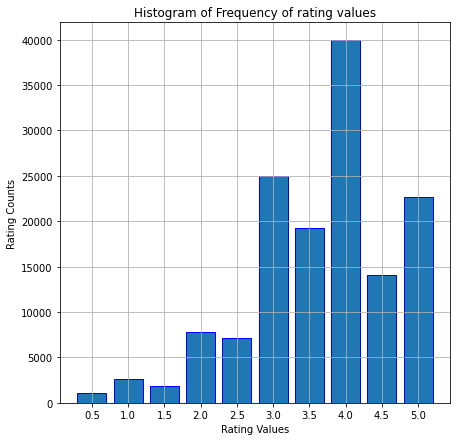

In [38]:
#Histogram of Frequency of rating values
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

bin_edges = np.arange(0.25,5.5,0.5)

_ = plt.hist(ratings_2['rating'],bins = bin_edges,edgecolor="b",rwidth=0.8)
_ = plt.title('Histogram of Frequency of rating values')
_ = plt.xlabel('Rating Values')
_ = plt.ylabel('Rating Counts')
_ = plt.grid('True')

plt.xticks(np.arange(0.5,5.5,0.5))
plt.show()

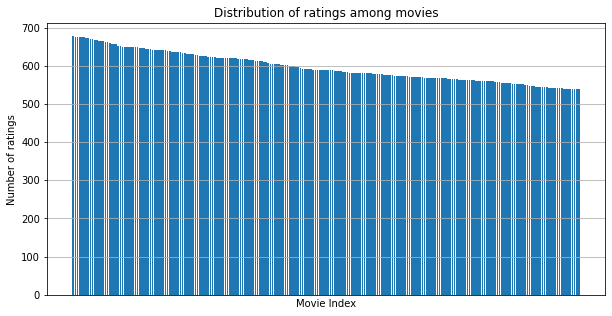

In [39]:
#Distribution of ratings among movies

from collections import Counter
plt.figure(figsize=(10,5))
plt.title('Distribution of ratings among movies')
plt.xlabel('Movie Index')
plt.ylabel('Number of ratings')
plt.grid('True')

# Sort movie ratings in decreasing order of ratings
ctr_movieratings = Counter(ratings_2['movieId'])
plt.xticks([], [])
plt.bar(np.arange(n_items),sorted(ctr_movieratings.values(),reverse = True))


plt.show()

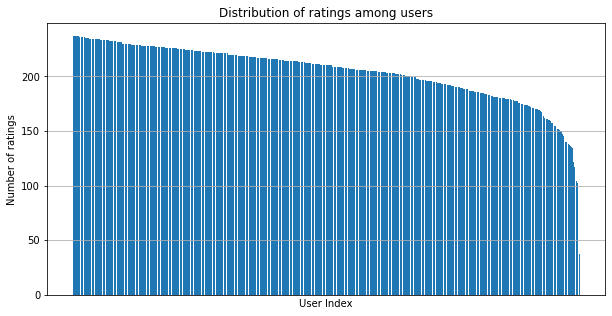

In [203]:
#Distribution of ratings among users
plt.figure(figsize=(10,5))
plt.title('Distribution of ratings among users')
plt.xlabel('User Index')
plt.ylabel('Number of ratings')
plt.grid('True')

# Sort user ratings in decreasing order of ratings
ctr_userratings = Counter(ratings['userId'])
plt.xticks([], [])
plt.bar(np.arange(n_users),sorted(ctr_userratings.values(),reverse = True))


plt.show()

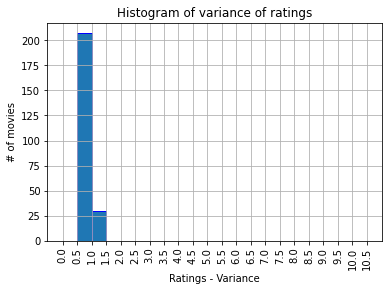

In [40]:

# there are two ways of calculating the variance 
#   - 1. direct as central 2nd order moment (https://en.wikipedia.org/wiki/Moment_(mathematics))divided by the length of the vector
#   - 2. "mean of square minus square of mean" (see https://en.wikipedia.org/wiki/Variance)

plt.xlabel('Ratings - Variance')
plt.ylabel('# of movies')
plt.grid('true')
plt.title('Histogram of variance of ratings')
bins = np.arange(0,11,0.5)

rate_var = ratings_2.groupby('movieId')['rating'].var().fillna(0).tolist()
plt.hist(rate_var, bins = bins ,edgecolor="b")

plt.xticks(np.arange(0,11,0.5),rotation="vertical")

plt.show()

In [41]:
from surprise import KNNWithMeans
from surprise.model_selection.validation import cross_validate
from surprise import Dataset
from surprise import Reader
import pandas as pd

dataframe = pd.DataFrame({'itemID': list(ratings_2.movieId), 'userID': list(ratings_2.userId), 'rating': list(ratings_2.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

#sweepking k from 2 to 100 by increments of 2
range1 = range(3,102,3)

rmse, mae = [], []
for k in range1:
    pearson = KNNWithMeans(k=k, sim_options = {'name':'pearson'}) 
    results = cross_validate(pearson, mydataset, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    rmse.append(np.mean(results['test_rmse']))
    mae.append(np.mean(results['test_mae']))


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

 average RMSE is 0.765889 index for k_index = 10 k = 33
 average MAE is 0.582008 index for k_index = 10 k = 33


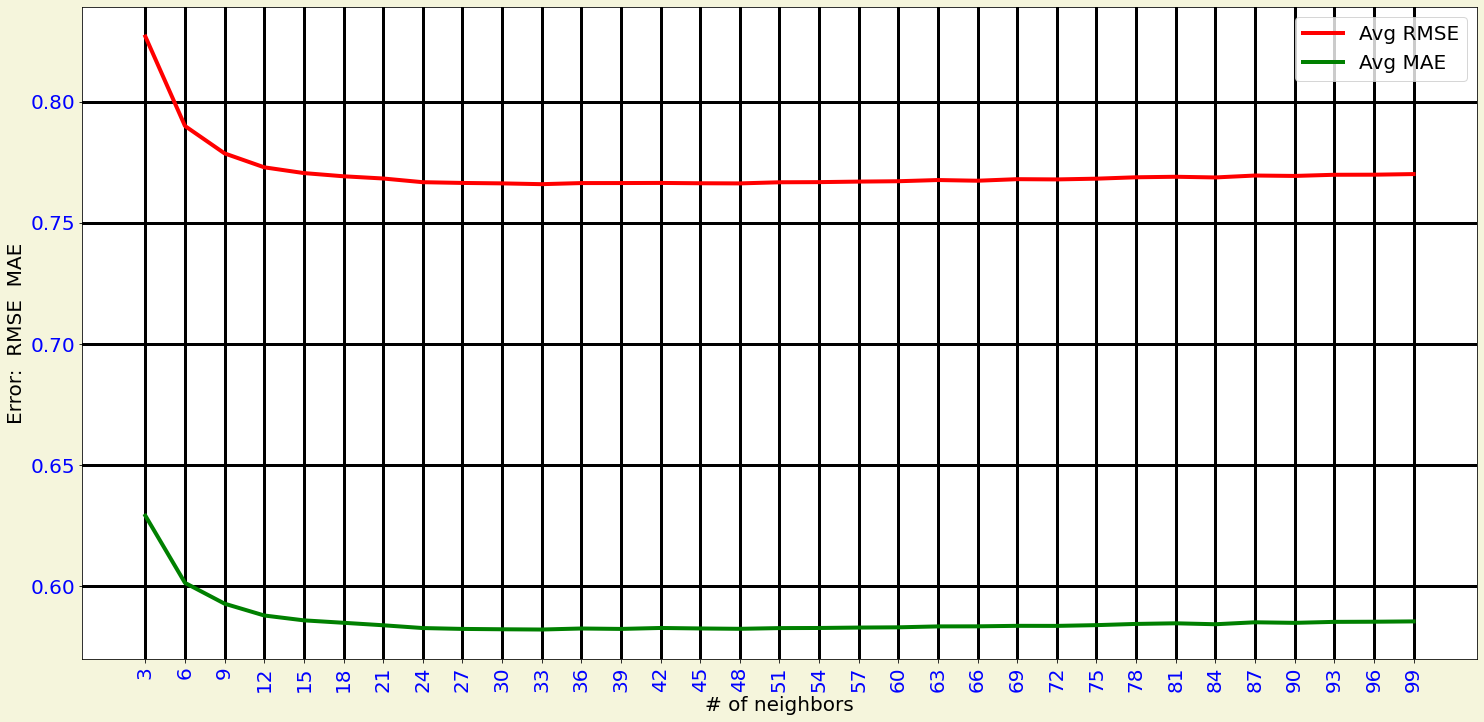

In [46]:
#plot 
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(25,12),facecolor = 'beige')

print(' average RMSE is %f index for k_index = %d k = %d' %(np.min(rmse),np.argmin(rmse),range1[np.argmin(rmse)]))
print(' average MAE is %f index for k_index = %d k = %d' %(np.min(mae),np.argmin(mae), range1[np.argmin(mae)]))
#Best K is 
BestK= range1[np.argmin(rmse)]

plt.plot(range1,np.array(rmse), label = "Avg RMSE",color = 'red',lw = 4)
plt.plot(range1,np.array(mae), label = "Avg MAE",color = 'green',lw = 4)
plt.xlabel('# of neighbors',fontsize=20)
plt.ylabel('Error:  RMSE  MAE',fontsize=20)
plt.grid('true', lw=3,color='black')
plt.legend(fontsize=20)
#plt.xticks(k_range,rotation="vertical",fontsize=18) np.arange(0,11,0.5)
plt.xticks(range1,fontsize=20,rotation="vertical",color='blue')
plt.yticks(fontsize=20,color='blue')
plt.show()

## Sample Predictions at best K 

In [98]:
def PredictRatingbyUserForItem(p_algo,uid,iid,actualRating):
    predObj=p_algo.predict(uid, iid,actualRating,verbose=True)
    return  predObj  

In [106]:
def ComputeBestSimilarityMatrix(df,BestK,UserBased=True):
    from surprise import KNNWithMeans
    from surprise import Dataset
    from surprise import Reader
    import pandas as pd


    dataframe = pd.DataFrame({'itemID': list(df.movieId), 'userID': list(df.userId), 'rating': list(df.rating)})
    moviescales = Reader(rating_scale=(0.5, 5.0))
    mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)
    #build Trainset object
    fullTrainSet=mydataset.build_full_trainset()
    pearson_algo = KNNWithMeans(k=BestK, sim_options = {'name':'pearson','user_based': UserBased}) 
    pearson_algo.fit(fullTrainSet)
    return pearson_algo

In [107]:
Pearson_algo=ComputeBestSimilarityMatrix(ratings_2,BestK,True)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [112]:
#Not a user
uid = str(138325)  
iid = str(71199)  
PredictRatingbyUserForItem(Pearson_algo,uid, iid, 0)

user: 138325     item: 71199      r_ui = 0.00   est = 3.67   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='138325', iid='71199', r_ui=0, est=3.666008883607763, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [113]:
#Not a user
uid = str(138325)  
iid = str(71199)  

# get a prediction for specific users and items.
pred = PredictRatingbyUserForItem(Pearson_algo,uid, iid, 0)

user: 138325     item: 71199      r_ui = 0.00   est = 3.67   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [114]:
#Not a user
uid = 138325  
iid = 5  

# get a prediction for specific users and items.
pred = PredictRatingbyUserForItem(Pearson_algo,uid, iid, 0)

user: 138325     item: 5          r_ui = 0.00   est = 3.67   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [116]:
#inaccurate Result 83275	1391	3
uid = 83275  
iid = 1391  

# get a prediction for specific users and items.

pred = PredictRatingbyUserForItem(Pearson_algo,uid, iid ,3)

user: 83275      item: 1391       r_ui = 3.00   est = 2.51   {'actual_k': 33, 'was_impossible': False}


In [117]:
#near accurate result 156	16	4	11/24/2002 2:35
uid = 156  
iid = 16 

# get a prediction for specific users and items.
pred = PredictRatingbyUserForItem(Pearson_algo,uid, iid, 4)

user: 156        item: 16         r_ui = 4.00   est = 4.40   {'actual_k': 33, 'was_impossible': False}


In [118]:
#near accurate result 118999	380	3	11/6/1999 19:52
uid = 118999  
iid = 380 

# get a prediction for specific users and items.
pred = PredictRatingbyUserForItem(Pearson_algo,uid, iid,3)

user: 118999     item: 380        r_ui = 3.00   est = 3.43   {'actual_k': 33, 'was_impossible': False}


# ROC Curves

Computing the pearson similarity matrix...
Done computing similarity matrix.


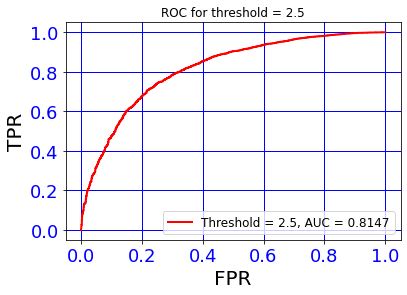

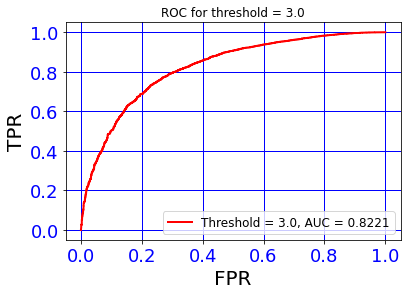

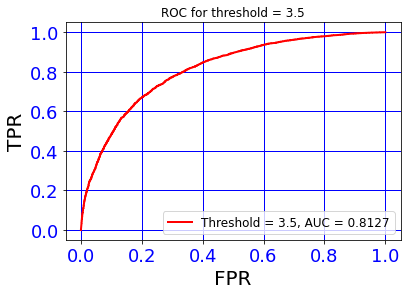

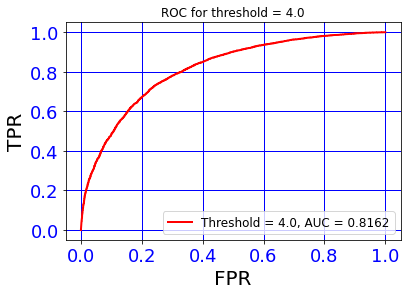

In [77]:
#roc curves
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

t = [2.5,3,3.5,4]
# split data into 90/10
traincorpus, testcorpus = train_test_split(mydataset, test_size=0.1, random_state=0)

pearson_algo = KNNWithMeans(k=BestK, sim_options = {'name':'pearson'}) 
pearson_algo.fit(traincorpus)

pred_act = pearson_algo.test(testcorpus)
pred_est = np.array([i.est for i in pred_act])
movieratings = np.array([i.r_ui for i in pred_act])

for threshold in t:
    y_score = pred_est
    y_true = movieratings>=threshold
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.grid('true',color='blue', linestyle='-', linewidth=1)
    plt.plot(fpr, tpr, lw=2, label='Threshold = %0.1f, AUC = %0.4f' % (threshold,roc_auc),color='red')
    plt.xlabel('FPR',fontsize=20)
    plt.ylabel('TPR',fontsize=20)
    plt.legend(loc ='best',fontsize=12)
    plt.title('ROC for threshold = %0.1f' %threshold)
    plt.xticks(fontsize=18,color='blue')
    plt.yticks(fontsize=18,color='blue')
    plt.show()
    

# Item-Based Collaborative Filtering Ex2 (Reduced Data)


In [101]:
from surprise import KNNWithMeans
from surprise.model_selection.validation import cross_validate
from surprise import Dataset
from surprise import Reader
import pandas as pd

dataframe = pd.DataFrame({'itemID': list(ratings_2.movieId), 'userID': list(ratings_2.userId), 'rating': list(ratings_2.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

#sweepking k from 2 to 100 by increments of 2
range1 = range(3,102,3)

rmse, mae = [], []
for k in range1:
    pearson = KNNWithMeans(k=k, sim_options = {'name':'pearson', 'user_based': False }) 
    results = cross_validate(pearson, mydataset, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    rmse.append(np.mean(results['test_rmse']))
    mae.append(np.mean(results['test_mae']))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

 average RMSE is 0.740228 index for k_index = 4 k = 15
 average MAE is 0.558456 index for k_index = 4 k = 15


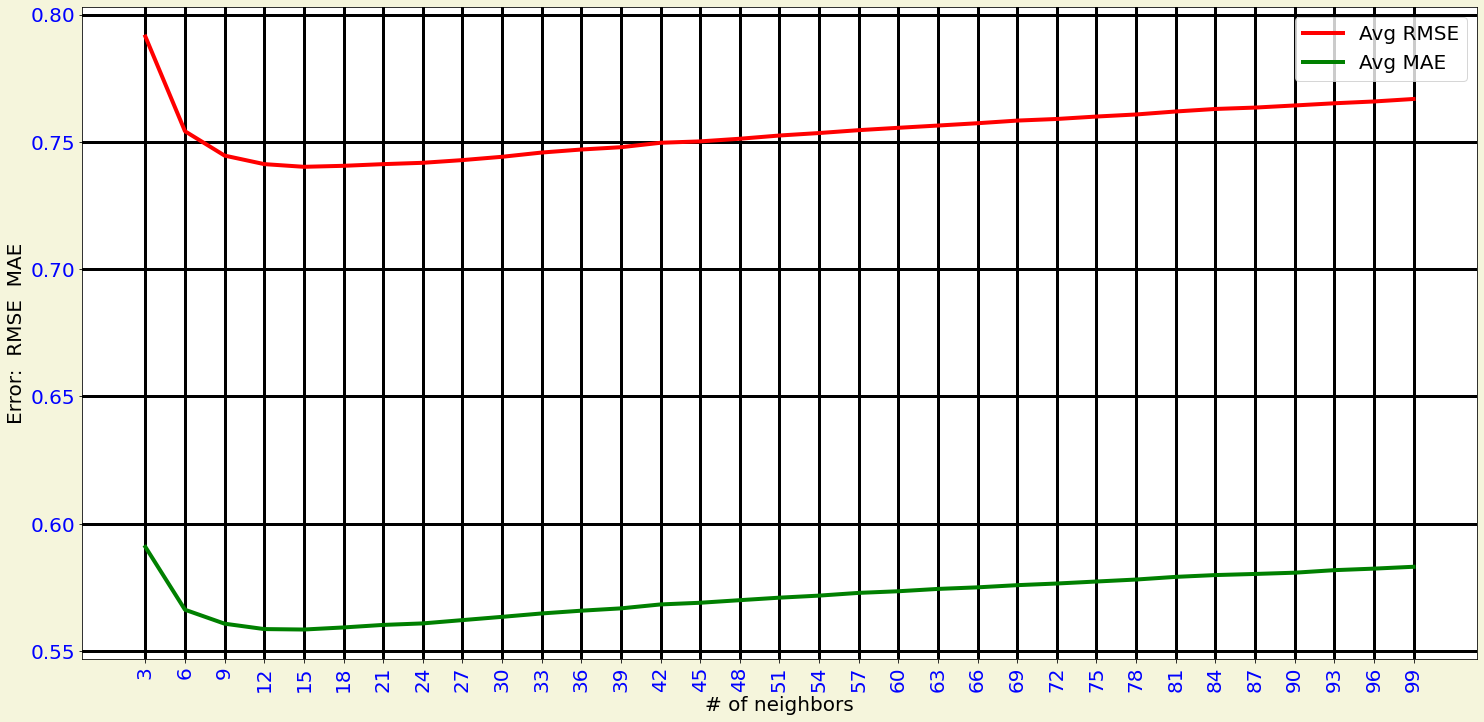

In [103]:
#plot 
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(25,12),facecolor = 'beige')

print(' average RMSE is %f index for k_index = %d k = %d' %(np.min(rmse),np.argmin(rmse),range1[np.argmin(rmse)]))
print(' average MAE is %f index for k_index = %d k = %d' %(np.min(mae),np.argmin(mae), range1[np.argmin(mae)]))
#Best K is 
BestK_2= range1[np.argmin(rmse)]

plt.plot(range1,np.array(rmse), label = "Avg RMSE",color = 'red',lw = 4)
plt.plot(range1,np.array(mae), label = "Avg MAE",color = 'green',lw = 4)
plt.xlabel('# of neighbors',fontsize=20)
plt.ylabel('Error:  RMSE  MAE',fontsize=20)
plt.grid('true', lw=3,color='black')
plt.legend(fontsize=20)
plt.xticks(range1,fontsize=20,rotation="vertical",color='blue')
plt.yticks(fontsize=20,color='blue')
plt.show()

## Sample Predictions at best K 

In [108]:
person_algo2=ComputeBestSimilarityMatrix(ratings_2,BestK_2,False)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [109]:
#inaccurate Result 83275	1391	3
uid = 83275  
iid = 1391  

# get a prediction for specific users and items.
pred = PredictRatingbyUserForItem(person_algo2,uid,iid,3)

user: 83275      item: 1391       r_ui = 3.00   est = 2.53   {'actual_k': 15, 'was_impossible': False}


In [110]:
#near accurate result 156	16	4
uid = 156  
iid = 16 

# get a prediction for specific users and items.
pred = PredictRatingbyUserForItem(person_algo2,uid,iid,4)

user: 156        item: 16         r_ui = 4.00   est = 4.12   {'actual_k': 15, 'was_impossible': False}


# Roc Curves

Computing the pearson similarity matrix...
Done computing similarity matrix.


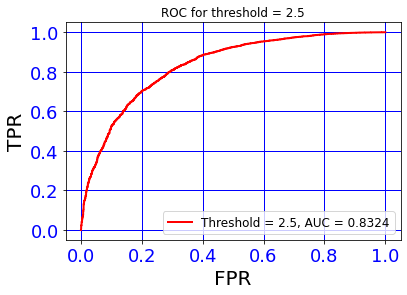

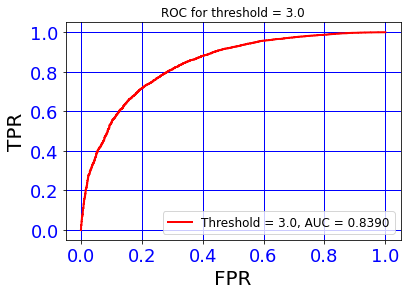

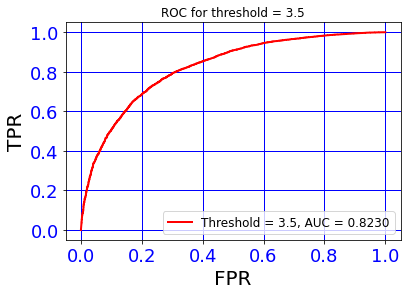

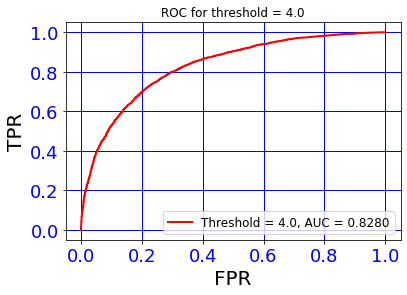

In [119]:
#roc curves
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

t = [2.5,3,3.5,4]
# split data into 90/10
traincorpus, testcorpus = train_test_split(mydataset, test_size=0.1, random_state=0)

pearson_algo_ = KNNWithMeans(k=BestK_2, sim_options = {'name':'pearson','user_based': False}) 
pearson_algo_.fit(traincorpus)

pred_act = pearson_algo_.test(testcorpus)
pred_est = np.array([i.est for i in pred_act])
movieratings = np.array([i.r_ui for i in pred_act])

for threshold in t:
    y_score = pred_est
    y_true = movieratings>=threshold
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.grid('true',color='blue', linestyle='-', linewidth=1)
    plt.plot(fpr, tpr, lw=2, label='Threshold = %0.1f, AUC = %0.4f' % (threshold,roc_auc),color='red')
    plt.xlabel('FPR',fontsize=20)
    plt.ylabel('TPR',fontsize=20)
    plt.legend(loc ='best',fontsize=12)
    plt.title('ROC for threshold = %0.1f' %threshold)
    plt.xticks(fontsize=18,color='blue')
    plt.yticks(fontsize=18,color='blue')
    plt.show()
    

# (Application) Recommend best N number of Movies To User X 

In [120]:
#Read Movie file to join movies'names with recommended ids  
#read file
allMovies = pd.read_csv('movie.csv')

In [123]:
#take only reduced movies
movies= allMovies[allMovies['movieId'].isin(Movieindices)]
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,6,Heat (1995),Action|Crime|Thriller
15,16,Casino (1995),Crime|Drama
20,21,Get Shorty (1995),Comedy|Crime|Thriller
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
...,...,...,...
7953,8636,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX
7982,8665,"Bourne Supremacy, The (2004)",Action|Crime|Thriller
8278,8961,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy
9937,32587,Sin City (2005),Action|Crime|Film-Noir|Mystery|Thriller


In [239]:
#Recommended items to user x 
def recommendBestMoviesToUser_UserOrItemBased(Orignaldf,person_algo_userOrItemResult,userID,numberOfMoviesToRecoomend):
    pred={}
    #get all user's records
    userRatings=Orignaldf[Orignaldf['userId']==userID]
    # get a prediction for specific user and items.
    for item in Orignaldf["movieId"].unique():
        if (not(userRatings[userRatings['movieId']==item]["rating"].empty)):
            r_ui=float(userRatings[userRatings['movieId']==item]['rating'])
        else:  
            r_ui=np.nan 
        predObj=person_algo_userOrItemResult.predict(uid, item,r_ui,verbose=True)
        pred[predObj.iid]=predObj.est
    ListOfSortedMovies=sorted(pred, key=pred.get,reverse=True) 
    return ListOfSortedMovies[0:numberOfMoviesToRecoomend]

In [250]:
#using ItemBased Result
RecommendedMovies_ItemBased=recommendBestMoviesToUser_UserOrItemBased(ratings_2,person_algo2,83275,20)

user: 118999     item: 1          r_ui = 4.50   est = 4.27   {'actual_k': 15, 'was_impossible': False}
user: 118999     item: 6          r_ui = nan   est = 4.24   {'actual_k': 15, 'was_impossible': False}
user: 118999     item: 16         r_ui = 4.00   est = 4.20   {'actual_k': 15, 'was_impossible': False}
user: 118999     item: 21         r_ui = nan   est = 4.04   {'actual_k': 15, 'was_impossible': False}
user: 118999     item: 32         r_ui = 2.00   est = 4.16   {'actual_k': 15, 'was_impossible': False}
user: 118999     item: 34         r_ui = nan   est = 4.15   {'actual_k': 15, 'was_impossible': False}
user: 118999     item: 47         r_ui = 4.00   est = 3.98   {'actual_k': 15, 'was_impossible': False}
user: 118999     item: 50         r_ui = 4.50   est = 4.09   {'actual_k': 15, 'was_impossible': False}
user: 118999     item: 110        r_ui = 4.00   est = 3.92   {'actual_k': 15, 'was_impossible': False}
user: 118999     item: 111        r_ui = nan   est = 4.49   {'actual_k': 15,

In [251]:
 movies[movies['movieId'].isin(RecommendedMovies_ItemBased)]

,movieId,title,genres
232,235,Ed Wood (1994),Comedy|Drama
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
523,527,Schindler's List (1993),Drama|War
602,608,Fargo (1996),Comedy|Crime|Drama|Thriller
737,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
843,858,"Godfather, The (1972)",Crime|Drama
887,904,Rear Window (1954),Mystery|Thriller
895,912,Casablanca (1942),Drama|Romance
906,923,Citizen Kane (1941),Drama|Mystery
936,953,It's a Wonderful Life (1946),Drama|Fantasy|Romance


In [293]:
#user-based collaborative filter more movies Ex4

In [252]:
RecommendedMovies_UserBased=recommendBestMoviesToUser_UserOrItemBased(ratings_2,Pearson_algo,83275,20)
RecommendedMovies_UserBased

user: 118999     item: 1          r_ui = 4.50   est = 4.46   {'actual_k': 33, 'was_impossible': False}
user: 118999     item: 6          r_ui = nan   est = 4.50   {'actual_k': 33, 'was_impossible': False}
user: 118999     item: 16         r_ui = 4.00   est = 4.09   {'actual_k': 33, 'was_impossible': False}
user: 118999     item: 21         r_ui = nan   est = 4.18   {'actual_k': 33, 'was_impossible': False}
user: 118999     item: 32         r_ui = 2.00   est = 4.21   {'actual_k': 33, 'was_impossible': False}
user: 118999     item: 34         r_ui = nan   est = 4.32   {'actual_k': 33, 'was_impossible': False}
user: 118999     item: 47         r_ui = 4.00   est = 4.23   {'actual_k': 33, 'was_impossible': False}
user: 118999     item: 50         r_ui = 4.50   est = 4.56   {'actual_k': 33, 'was_impossible': False}
user: 118999     item: 110        r_ui = 4.00   est = 3.75   {'actual_k': 33, 'was_impossible': False}
user: 118999     item: 111        r_ui = nan   est = 4.94   {'actual_k': 33,

[750,
 858,
 923,
 1221,
 1252,
 912,
 111,
 1213,
 296,
 608,
 904,
 527,
 924,
 1198,
 1266,
 541,
 903,
 1193,
 593,
 1219]

In [253]:
movies[movies['movieId'].isin(RecommendedMovies_UserBased)]

,movieId,title,genres
109,111,Taxi Driver (1976),Crime|Drama|Thriller
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
523,527,Schindler's List (1993),Drama|War
537,541,Blade Runner (1982),Action|Sci-Fi|Thriller
587,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
602,608,Fargo (1996),Comedy|Crime|Drama|Thriller
737,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
843,858,"Godfather, The (1972)",Crime|Drama
886,903,Vertigo (1958),Drama|Mystery|Romance|Thriller
887,904,Rear Window (1954),Mystery|Thriller
